In [ ]:
'''
Tasks:
1.	Data Cleaning and Preparation:
●	Load the dataset into a DataFrame or equivalent data structure.
●	Handle missing values appropriately (e.g., imputation, deletion).
●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
●	Detect and treat outliers if necessary.
2.	Statistical Summary:
●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion 
(standard deviation, interquartile range).
●	Highlight any interesting findings from this summary.
3.	Data Visualization:
●	Create histograms or boxplots to visualize the distributions of various numerical variables.
●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.
4.	Pattern Recognition and Insights:
●	Identify any correlations between variables and discuss their potential implications.
●	Look for trends or patterns over time if temporal data is available.
5.	Conclusion:
●	Summarize the key insights and patterns discovered through your exploratory analysis.
●	Discuss how these findings could impact decision-making or further analyses.
Deliverables:
●	A detailed Jupyter Notebook file containing the code, visualizations, and explanations for each step of your analysis.
●	A brief report summarizing your findings, insights, and any recommendations for further analysis or actions based on the data.
'''

In [ ]:
'''
1.	Data Cleaning and Preparation:
●	Load the dataset into a DataFrame or equivalent data structure.
●	Handle missing values appropriately (e.g., imputation, deletion).
●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
●	Detect and treat outliers if necessary.
'''

In [1]:
#Load the dataset into a DataFrame or equivalent data structure.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\\Users\\sujey\\Downloads\\Assignments\\EDA1\\Cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [2]:
#Handle missing values appropriately (e.g., imputation, deletion).
# Impute missing values with median
df_clean = df.fillna(df.median(numeric_only=True))

# IQR-based outlier treatment function
def cap_outliers_iqr(column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean[column] = np.where(df_clean[column] < lower, lower,
                                np.where(df_clean[column] > upper, upper, df_clean[column]))

# Apply to all numeric columns
for col in df_clean.columns:
    if df_clean[col].dtype != 'object':
        cap_outliers_iqr(col)

In [3]:
summary = df_clean.describe().T
summary["median"] = df_clean.median()
summary["IQR"] = df_clean.quantile(0.75) - df_clean.quantile(0.25)
summary

,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,2126.0,133.290331,9.930268,105.000000,126.000000,133.000000,140.000000,161.000000,133.000000,14.000000
AC,2126.0,0.003132,0.003828,-0.008409,0.000000,0.001634,0.005606,0.014015,0.001634,0.005606
FM,2126.0,0.001568,0.002485,-0.003850,0.000000,0.000000,0.002567,0.006416,0.000000,0.002567
UC,2126.0,0.004362,0.003001,-0.005177,0.001851,0.004484,0.006536,0.013564,0.004484,0.004685
DL,2126.0,0.001770,0.002668,-0.004934,0.000000,0.000000,0.003289,0.008224,0.000000,0.003289
DS,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,2126.0,46.981873,17.612745,-11.500000,32.000000,49.000000,61.000000,104.500000,49.000000,29.000000
MSTV,2126.0,1.304644,0.781091,-0.800000,0.700000,1.200000,1.700000,3.200000,1.200000,1.000000
ALTV,2126.0,6.691678,10.378400,-16.500000,0.000000,0.000000,11.000000,27.500000,0.000000,11.000000


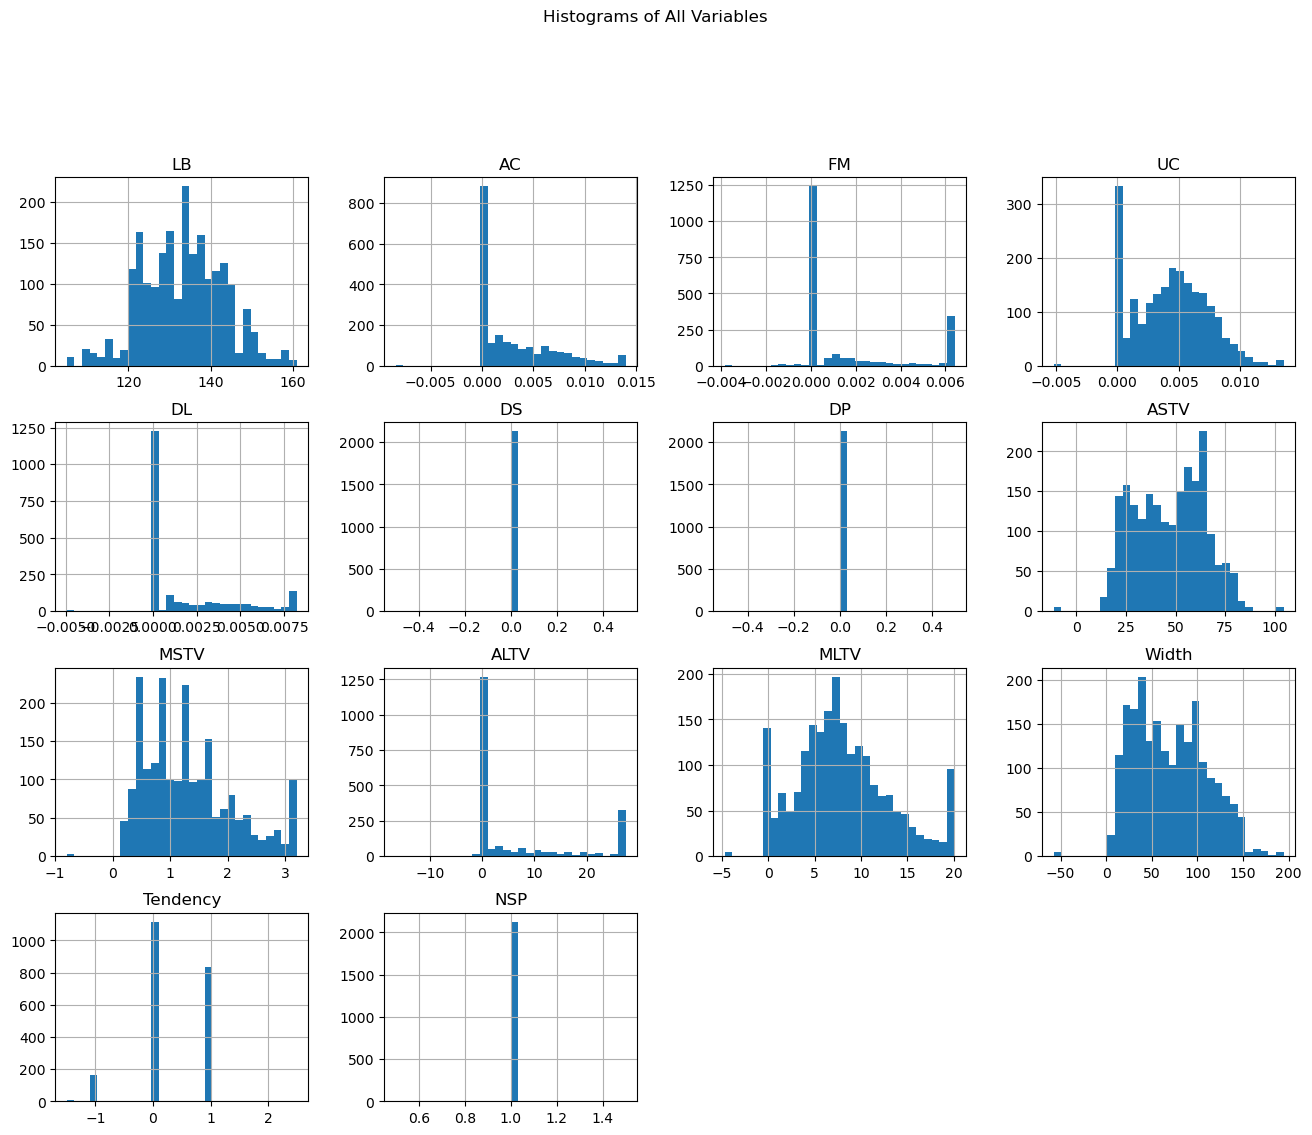

In [4]:
df_clean.hist(bins=30, figsize=(16, 12))
plt.suptitle("Histograms of All Variables", y=1.02)
plt.show()

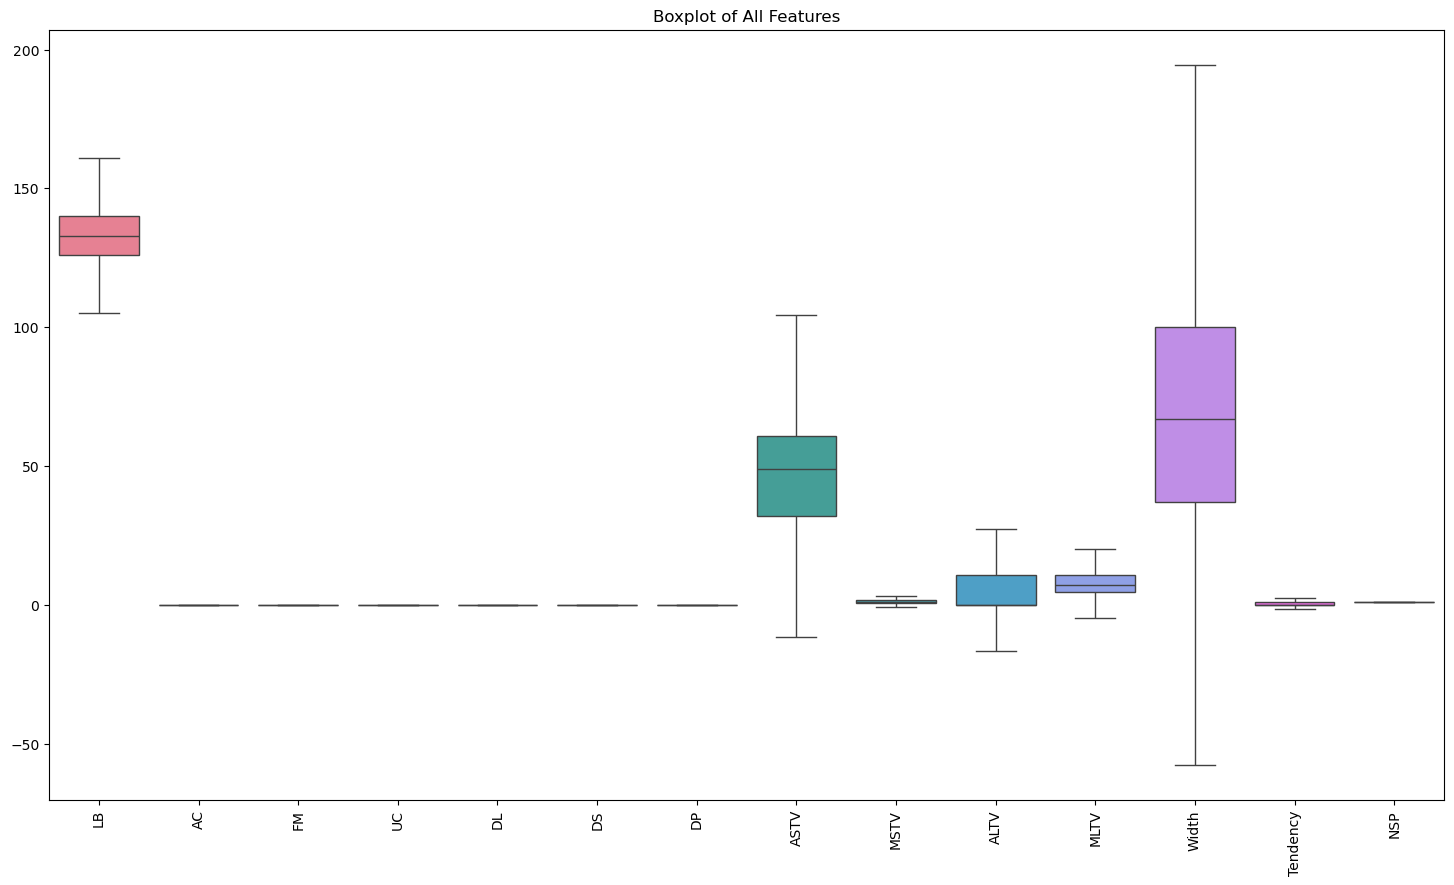

In [5]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_clean)
plt.title("Boxplot of All Features")
plt.xticks(rotation=90)
plt.show()

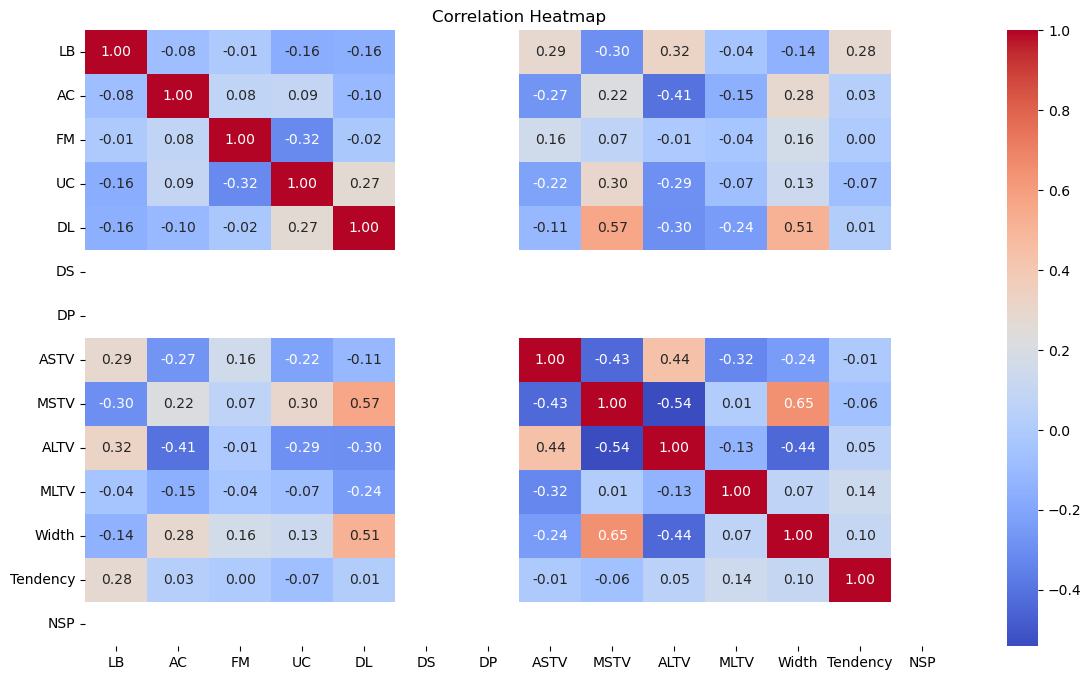

In [7]:
plt.figure(figsize=(14, 8))
corr = df_clean.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

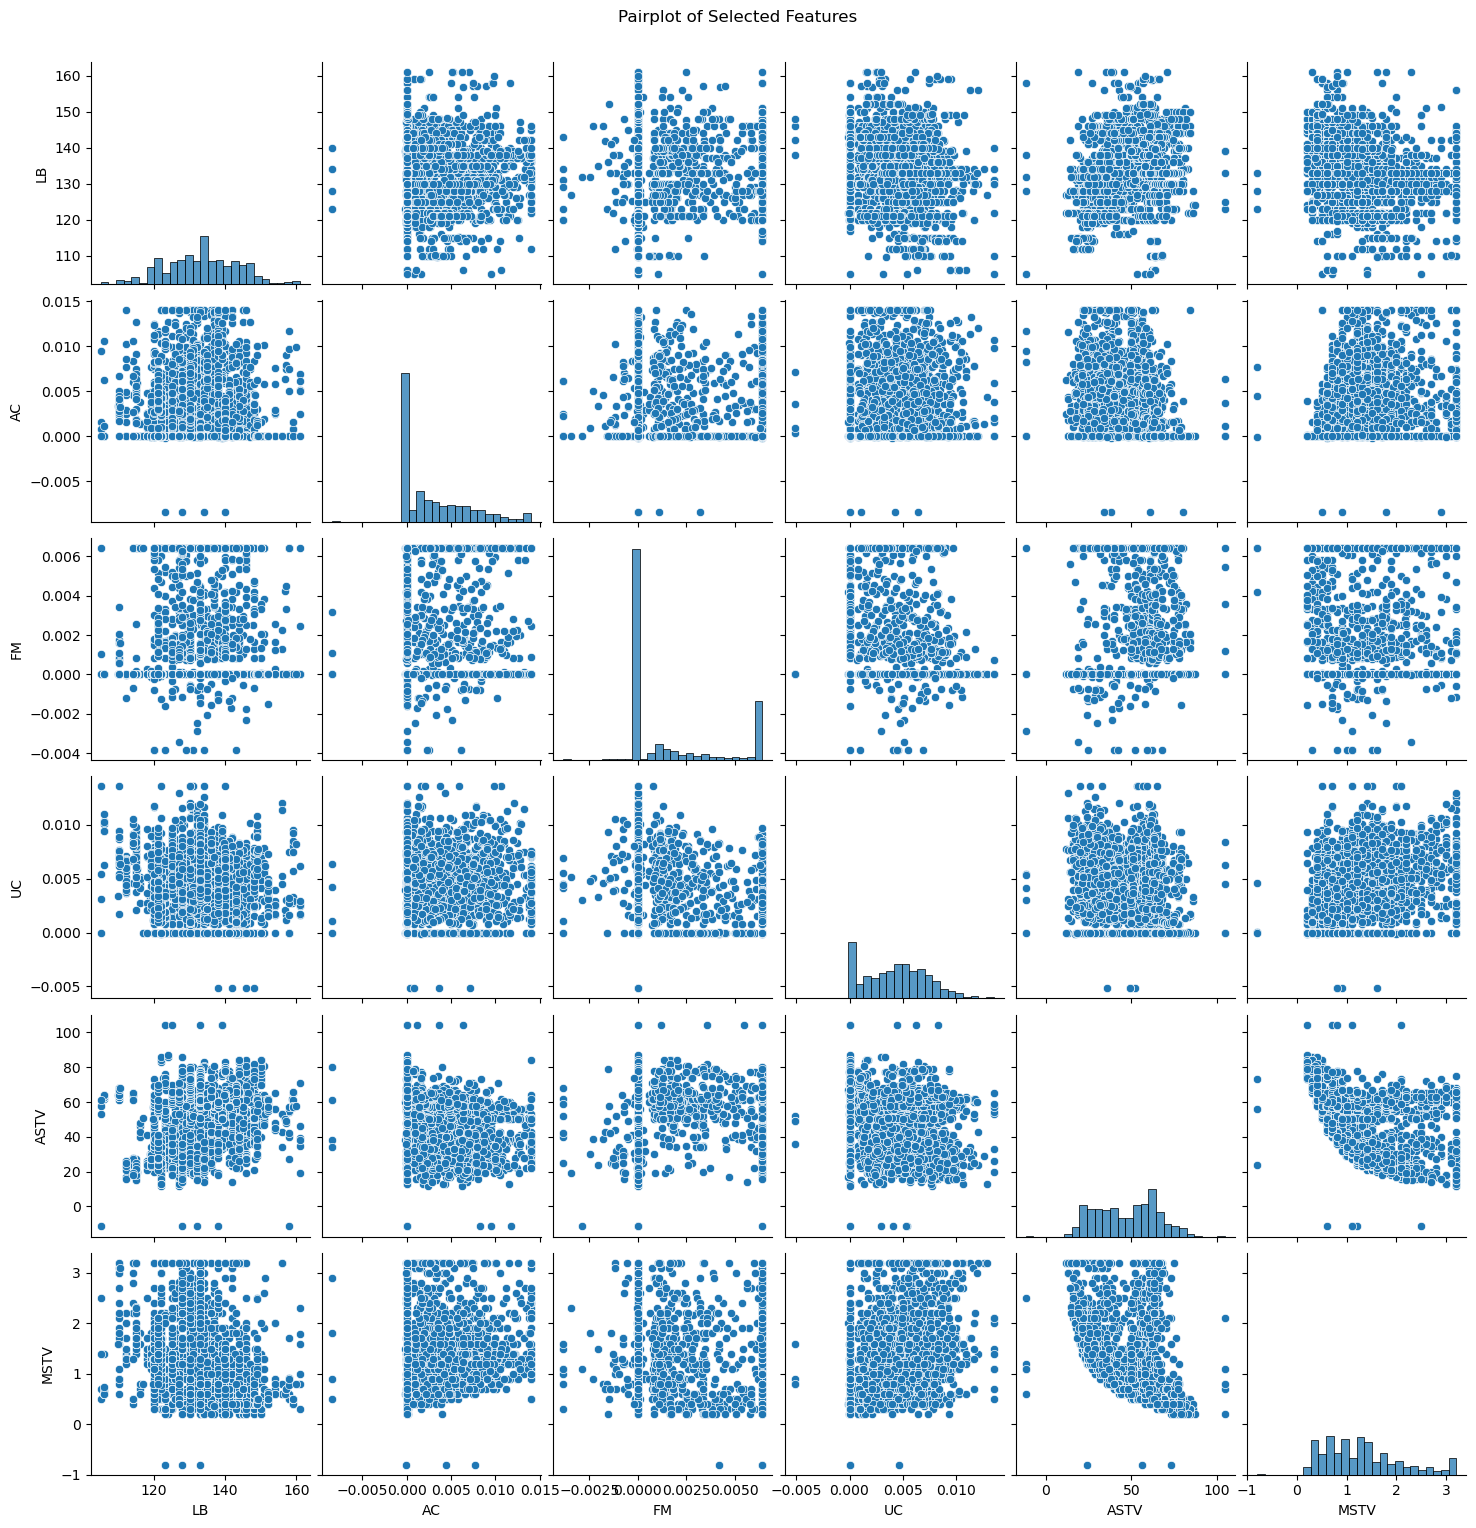

In [8]:
sample_cols = ['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV']
sns.pairplot(df_clean[sample_cols])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

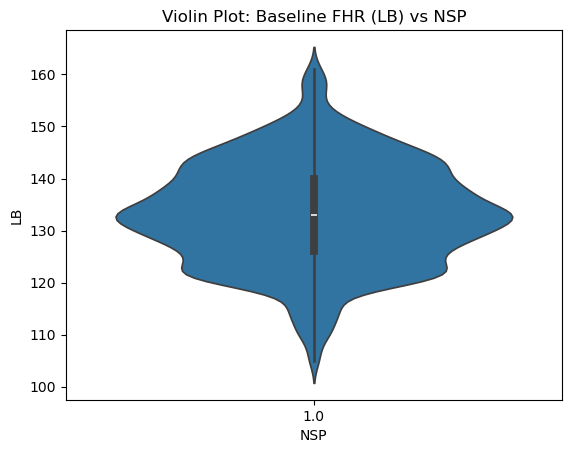

In [9]:
sns.violinplot(data=df_clean, x='NSP', y='LB')
plt.title("Violin Plot: Baseline FHR (LB) vs NSP")
plt.show()

In [10]:
strong_corr = corr[((corr >= 0.6) | (corr <= -0.6)) & (corr != 1.0)].stack().reset_index()
strong_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
strong_corr.sort_values(by='Correlation', ascending=False).head(10)

,Feature 1,Feature 2,Correlation
0,MSTV,Width,0.645744
1,Width,MSTV,0.645744


In [12]:
# Conclusion

 print("Dataset was cleaned by filling missing values with median and capping outliers using IQR.")
 print("Visualizations helped understand distributions and relationships.")
 print("Moderate correlation found between MSTV and Width (~0.65).")
 print("Most cases are labeled NSP = 1, indicating likely normal fetal health.")
 print("This EDA lays a solid foundation for further tasks like classification or anomaly detection.")


'\n- Dataset was cleaned by filling missing values with median and capping outliers using IQR.\n- Visualizations helped understand distributions and relationships.\n- Moderate correlation found between MSTV and Width (~0.65).\n- Most cases are labeled NSP = 1, indicating likely normal fetal health.\n- This EDA lays a solid foundation for further tasks like classification or anomaly detection.\n'